# Projeto 2 - Fabio Ferreira, Joras Oliveira e José Fernandes

TEMOS Q DESCREVER O PROJETO E COLOCAR O DIAGRAMA DE ESTOQUES E FLUXOS

**Importando bibliotecas**

In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import math

**Definindo os parâmetros**

In [2]:
p = 79 #Potência do motor (W)
e = 0.77 #Eficiência do motor (77%)

Magua = 0.3 #Massa da água no copo (Kg)
Cagua = 4220 #Calor específico da água (J/Kg*K) 
Mar = 0.81 #Massa de ar no freezer (Kg)
Car = 1005 #Calor específico do ar (J/Kg*K)

T0agua = 363.15 #Temperatura inicial do ar (K)
T0ar = 257.15 #Temperatura inicial da água (K)
t = [T0agua, T0ar] 
Tamb = 298.15 #Temperatura do ambiente (K)

Ac = (0.05 * 0.05) + (0.05 * 0.15 * 4) #Area do copo (m)
As = (0.05 * 0.05) #Area da superfície(m)
Areaintparede = (0.45 * 0.45 * 2) + (1 * 0.5 * 4) #(m)
Areaextparede = (0.5 * 0.5 * 2) + (1 * 0.5 * 4) #(m)
a = [Areaintparede, Areaextparede] #Area interna e externa da parede
Dparede = 0.05 #Espessura da parede (m)
r1 = 0.037 #raio interno do copo (m)
r2 = 0.04 #raio externo do copo (m)

h = 10 #Coeficiente de transferencia convectiva da água (W/m^2*K)
Kc = 0.02 #Coeficiente de condutividade térmica do copo(W/m*K)
Kp = 0.05 #Coeficiente de condutividade térmica da parede(W/m*K)

**Calculando as resistências térmicas**

In [6]:
R = math.log(r2/r1)/(Kp * 0.12 * 2 *math.pi)
res = 1/(h * Ac)
res1 = 1/(h * Areaintparede)
res2 = Dparede/(Kp * Areaintparede)
res3 = 1/(h * Areaextparede)

**Criando a função do modelo**

In [7]:
def modelo(T, t): 
    Tagua = T[0]
    Tar = T[1]
    
    q1 = h * As * (Tagua - Tar)
    q2 = (Tagua - Tar) / (res + R)            
    qp = (Tamb - Tar) / (res1 + res2 + res3)
    qm = p* e
    
    dtAguadT = 1/(Magua * Cagua)*(-q1 - q2)
    dtArdT = 1/(Mar * Car)*(q1 + q2 + qp - qm)
    dxdt = [dtAguadT,dtArdT]
    
    return dxdt

**Resolvendo o modelo e plotando o gráfico**

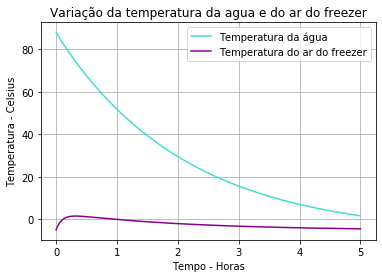

In [11]:
#Criando a lista de tempo
deltaT = 1
tempo = np.arange(1, 18000, deltaT) #5h 

#Resolvendo o modelo
solucao = odeint(modelo, t, tempo)

#Plotando o gráfico
plt.plot(tempo/3600, solucao[:,0]-275.15, "turquoise", label = "Temperatura da água")
plt.plot(tempo/3600, solucao[:,1]-273.15, "darkmagenta",  label ='Temperatura do ar do freezer')
plt.xlabel("Tempo - Horas")
plt.ylabel("Temperatura - Celsius")
plt.title("Variação da temperatura da agua e do ar do freezer")
plt.grid(True)
plt.legend()
plt.show()

**Dados de validação**

**Gráfico comparativo entre validação e modelo**

# **Perguntas e Gráficos Conclusivos**

Primeira pergunta: De que forma as dimensões do copo alteram a temperatura final da água após três horas?

Segunda pergunta:  Alterar a massa de água interfere no tempo para a temperatura atingir 0˚C?

Terceira Pergunta: Como diferentes eficiências do motor alteram o tempo de equilíbrio do modelo?


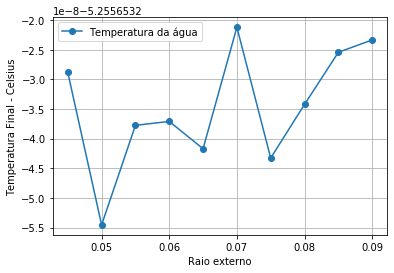

In [58]:
#Priemeira pergunta
AltC = 0.12 #altura do copo em metros
Re = [0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09] # diferentes dimensoes para o raio externo
Ri = []  # raio interno
Ma = []  #massa de agua no copo
valores = []  os valores que teremos no final

for r in Re:
    Ri.append(r-0.003) #o raio interneo = o raio extermo - a espessura do copo
    
for r in Ri:
    Ma.append(r*AltC) #calculando a massa da agua para cada dimensao do copo
    
    
n = 0
for n in range(10):
    R = math.log(Re[n]/Ri[n])/(Kp * 0.12 * 2 *math.pi) #recalulando o R para o modelo
    Magua = Ma[n] #redefinindo o valor de Magua no modelo
    result = odeint(modelo, t, tempo)
    k = result[:,-1]
    #print(k)
    valores.append(k[-1] - 273.15) # colocando a temperatura final na lista, e convertendo para celcius
    n+=1
    
    
deltaT = 1
tempo = np.arange(1, 10800, deltaT) #3h 
    
plt.plot(Re, valores, 'o-', label = "Temperatura da água",)
#plt.plot(Re, valores, "darkmagenta",  label ='Temperatura do ar do freezer')
plt.xlabel("Raio externo")
plt.ylabel("Temperatura Final - Celsius")
#plt.title("Variação da temperatura da agua e do ar do freezer")
plt.grid(True)
plt.legend()
plt.show()